# Single-cell amplicon (scamp) basic tutorial

This notebook serves as a basic tutorial for the `scamp` toolkit for detecting and analyzing focal amplifications from single-cell data.

The main module in `scamp` is classification of inferred amplifications as either ecDNA (extrachromosomal DNA) or not. This is done with a pre-trained machine learning model released with scamp in the `./pretrained_models` directory. As input to the classificaiton procedure, a tab-delimited gene-aggregated copy-number matrix should be provided; for example:

```
aggregated_gene_cnvs.tsv:
            Gene1    Gene2    Gene3
cellBC1     2        2        10
cellBC2     2        3        12
cellBC3     2        2        15
...
```

`scamp` will produce a likelihood of each gene being amplified on ecDNA from the observed copy-number distributions.

We'll provide a brief tutorial on how to use this pipeline with the tutorial data stored in `./data/example_copy_numbers.tsv.gz`.

In [8]:
import matplotlib.pyplot as plt
import mplscience
import pandas as pd
from scamp import predict
import seaborn as sns

In [47]:
copy_numbers_file = "../data/colo320dm_cna_subset.tsv" # an example copy-number data frame, containing only top 1000 genes for COLO320DM
model_file = "../pretrained_models/scamp_model_1.0/" # pretrained model

# other parameters
decision_rule = 0.6 # probability threshold for ecDNA
min_copy_number = 3 # minimum copy-number for determining distribution (best to just take amplified cells)
max_percentile = 99.9 # filter out outlier observations when computing copy-number distribution
filter_copy_number = 2 # filter out genes whose average copy-number falls below this value

In [48]:
predictions = predict.predict_ecdna_from_copy_number(
            copy_numbers_file,
            model_file,
            decision_rule,
            min_copy_number,
            max_percentile,
            filter_copy_number,
            whitelist_file=None
        )

In [49]:
predictions.loc[predictions['pred'] == True]

,mean,var,dispersion,gene,proba,pred
24,40.164592,367.770771,9.156592,CASC8,0.730769,True
25,40.164592,367.770771,9.156592,POU5F1B,0.730769,True
26,40.164592,367.770771,9.156592,MYC,0.730769,True
27,40.164592,367.770771,9.156592,MIR1204,0.730769,True
28,35.092498,312.981425,8.918756,FAM84B,0.730767,True
29,33.598718,252.797798,7.524031,PCAT1,0.730696,True
30,30.402171,207.049774,6.810361,PVT1,0.730694,True
31,30.402171,207.049774,6.810361,MIR1205,0.730694,True
32,30.402171,207.049774,6.810361,MIR1206,0.730694,True
33,30.402171,207.049774,6.810361,MIR1207,0.730694,True


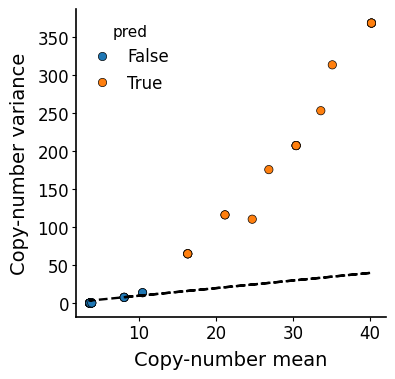

In [50]:
with mplscience.style_context():

    sns.scatterplot(predictions, x='mean', y='var', hue='pred', edgecolor='black')
    plt.plot(predictions['mean'], predictions['mean'], color='black', linestyle='dashed')
    plt.xlabel("Copy-number mean")
    plt.ylabel("Copy-number variance")
    plt.show()

## Appendix: Copy-number inference from ATAC-seq data
For inferring copy-numbers from scATAC-seq data, we include a well-established pipeline originally used in [Satpathy et al, _Nature Biotechnology_ 2019](https://www.nature.com/articles/s41587-019-0206-z). The procedure is implemented in the R script contained in `./scripts/scATAC_CNV.R` and can be invoked with `scamp atac-cnv`.

As input, this pipeline accepts the fragments file output from 10X's CellRanger suite. Briefly, the fragments file is a tab-delimited file storing the region and support for reach fragment on a cell-by-cell basis; for example:

```
atac_fragments.tsv:
1	10067	10345	TTTCCGGGTCACGAAC-1	1
1	10073	10192	TAGCGGACAGCAAATA-1	1
1	10079	10308	AGCGCCTAGCTATATG-1	1
1	10084	10332	TTGTCAAAGTCAATTG-1	2
1	10085	10346	CATAGTCAGTAAGGGC-1	1
```

A more detailed python implementation of this pipeline and tutorial is in progress.